### <span style="color:red">"CAUSALITY"</span>

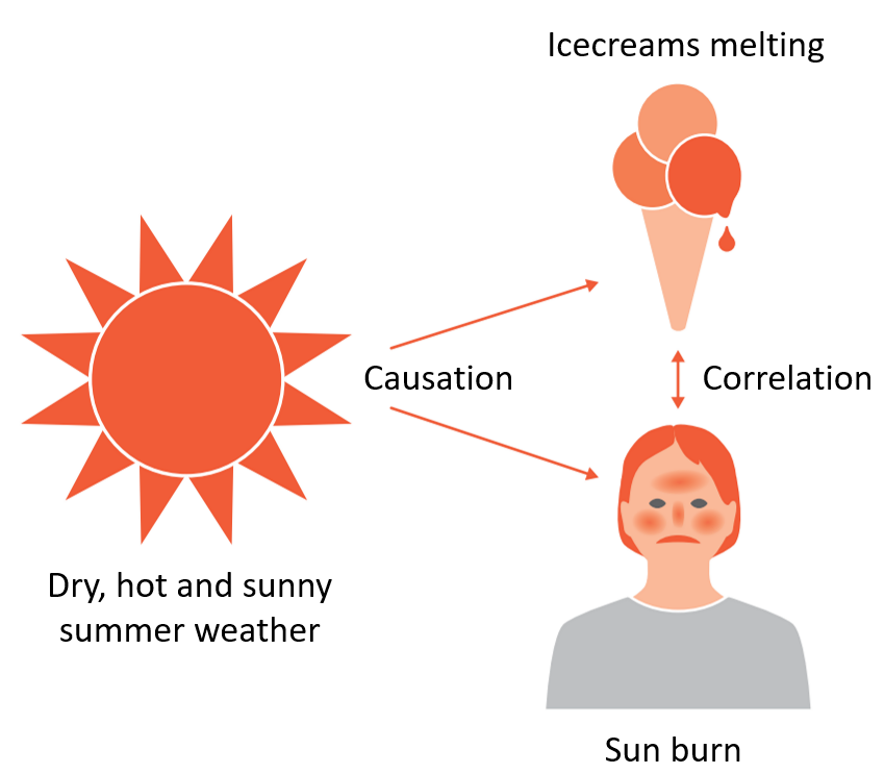

Definition and Importance:

1.Causality identifies the cause-and-effect relationships between variables.
It is fundamental for understanding the underlying dynamics of data, which is critical for prediction, intervention, and policy-making.

2.Contrast with Correlation:

Correlation indicates a statistical association between variables, without implying causation.
Causality goes beyond correlation by establishing a direct cause-effect relationship.

3.Causal Inference:

The process of determining causality from data, often when randomized experiments are not feasible.
Involves statistical methods to estimate the effect of an intervention on an outcome.

4.Randomized Controlled Trials (RCTs):

Considered the gold standard for establishing causality.
Subjects are randomly assigned to treatment or control groups to isolate the effect of the treatment.

5.Observational Studies:

When RCTs are not possible, observational data is used.
Challenges include confounding variables, selection bias, and reverse causation.

6.Statistical Methods:

Techniques such as regression analysis, propensity score matching, and instrumental variables are used to infer causality from observational data.
Causal discovery algorithms attempt to identify causal relationships directly from data.

7.Potential Outcomes Framework:

A conceptual model for causal inference, comparing the outcome if the treatment is applied vs. if it is not.
Helps in understanding causal effects and counterfactuals.

### Primarily Focus
#### <span style="color:red">8.Granger Causality:</span>

#### <span style="color:red">A specific method used in time series analysis to determine whether one time series can predict another.</span>

9.Causal Diagrams and Graphical Models:

Tools like Directed Acyclic Graphs (DAGs) represent and reason about causation.
Help in identifying confounding variables and clarifying causal assumptions.
Applications:

From medicine (understanding drug effects) to economics (evaluating policy impacts), causality helps in making informed decisions.
In business, it guides strategies by understanding what factors drive outcomes.

### TOPIC - <span style="color:red">"Climate Chronoscope: Unraveling the Nexus Between CO2 Emissions and Global Temperature Trends"</span>

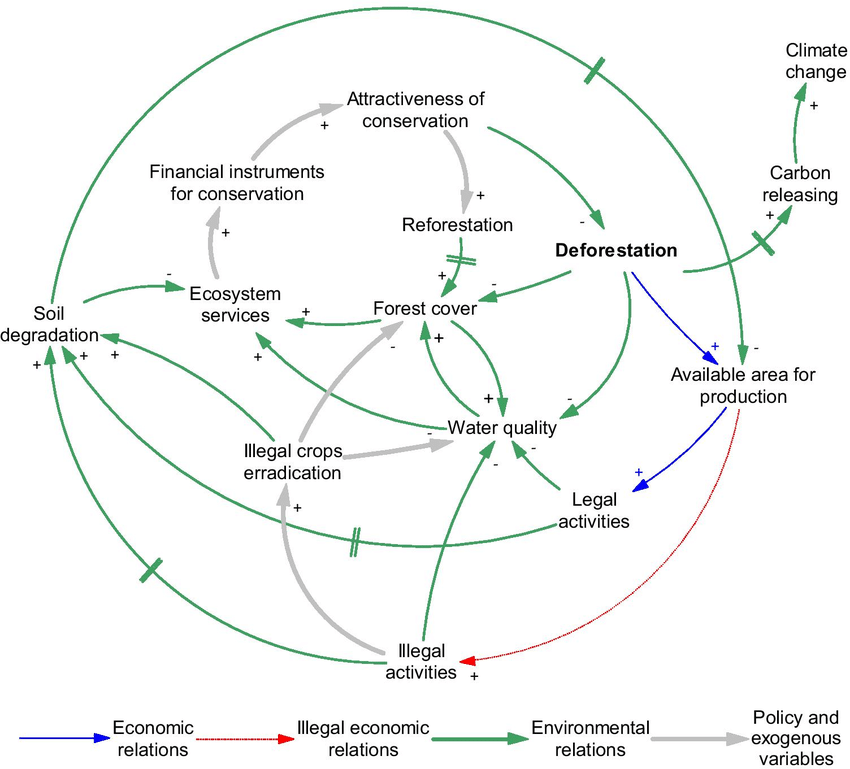

### Introduction to the Worked Example Problem

#### Average Temperature Dataset (1900-2023)

This dataset tracks the average temperature, measured in Fahrenheit, from the year 1900 through to 2023. Each row represents a year and its corresponding average temperature. For example, the average temperature in 1900 was 53.9°F, while in 1904, it was slightly cooler at 51.8°F. The purpose of this dataset is likely to analyze trends in temperature over time, which can be crucial for studies on climate change, weather patterns, and their impacts on the environment and human activities.

#### Global CO2 Emissions Dataset 
#### <span style="color:red">(Even though the dataset offers data starting from 1750, we will focus on information from 1900 onwards, which perfectly aligns with our Average Temperature Dataset)
</span>

The Global CO2 Emissions dataset provides annual carbon dioxide emissions measured in millions of tons from the year 1750 to the present. The dataset starts significantly earlier than the temperature dataset, offering a historical perspective on how CO2 emissions have evolved over time, starting from as little as 0.03 million tons in 1750. This information is critical for understanding the relationship between human activities, especially industrialization, and their impact on the global climate. It also serves as a foundational dataset for environmental science, policy making, and efforts to mitigate climate change by tracking the progress and effectiveness of such interventions over time.

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the datasets
temperature_df = pd.read_csv('https://raw.githubusercontent.com/Samar1947/Dataset/main/Average%20Temperature%201900-2023.csv')
co2_emissions_df = pd.read_csv('https://raw.githubusercontent.com/Samar1947/Dataset/main/GlobalCO2Emissions.csv')

# Display the first few rows of each dataset to understand their structures
temperature_df.head(), co2_emissions_df.head()


(   Year  Average_Fahrenheit_Temperature
 0  1900                            53.9
 1  1901                            53.5
 2  1902                            52.1
 3  1903                            50.6
 4  1904                            51.8,
    Year  Emissions
 0  1750       0.03
 1  1760       0.03
 2  1770       0.03
 3  1780       0.03
 4  1790       0.04)

### Data Profiling

In [30]:
# Data Types and Range
data_types_temperature = temperature_df.dtypes
data_types_co2 = co2_emissions_df.dtypes

# Missing Values
missing_values_temperature = temperature_df.isnull().sum()
missing_values_co2 = co2_emissions_df.isnull().sum()

# Summary Statistics
summary_stats_temperature = temperature_df.describe()
summary_stats_co2 = co2_emissions_df.describe()

data_types_temperature, data_types_co2, missing_values_temperature, missing_values_co2, summary_stats_temperature, summary_stats_co2


(Year                                int64
 Average_Fahrenheit_Temperature    float64
 dtype: object,
 Year           int64
 Emissions    float64
 dtype: object,
 Year                              0
 Average_Fahrenheit_Temperature    0
 dtype: int64,
 Year         0
 Emissions    0
 dtype: int64,
               Year  Average_Fahrenheit_Temperature
 count   124.000000                      124.000000
 mean   1961.500000                       52.262903
 std      35.939764                        1.534083
 min    1900.000000                       48.200000
 25%    1930.750000                       51.175000
 50%    1961.500000                       52.200000
 75%    1992.250000                       53.500000
 max    2023.000000                       55.300000,
               Year  Emissions
 count    29.000000  29.000000
 mean   1889.827586   5.937586
 std      84.855368  11.443084
 min    1750.000000   0.030000
 25%    1820.000000   0.060000
 50%    1890.000000   0.430000
 75%    1960.000

### Missing Values
#### <span style="color:red">There are no missing values in either dataset, indicating that the data is complete for the analysis period.</span>

### Data Visualization

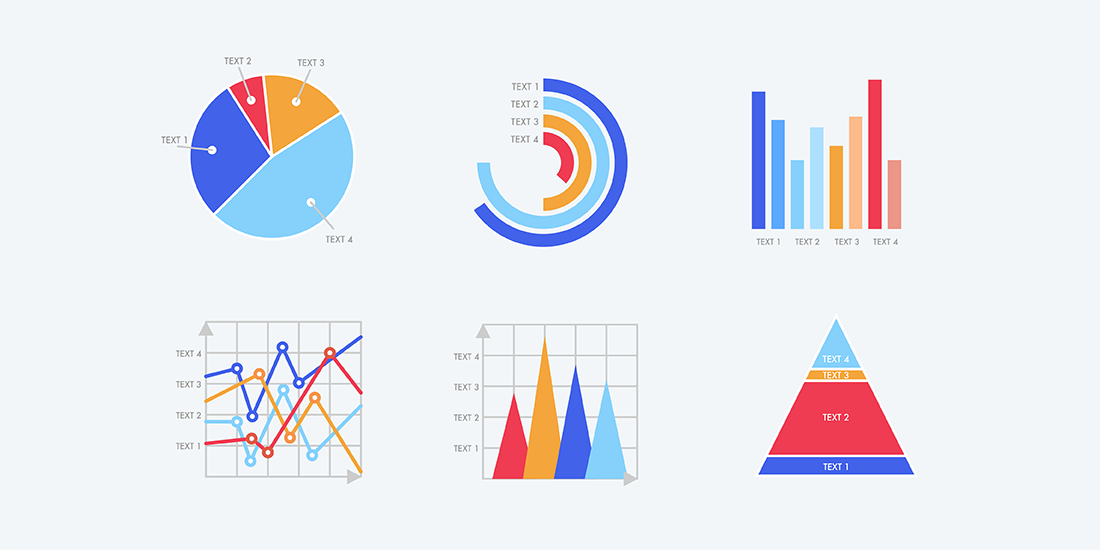

### 'TIME SERIES'

#### The plot below illustrates the global average temperature over time, from 1900 to 2023.

#### This visual representation provides a clear view of the temperature trend over the specified period, which can be critical for understanding climate change dynamics

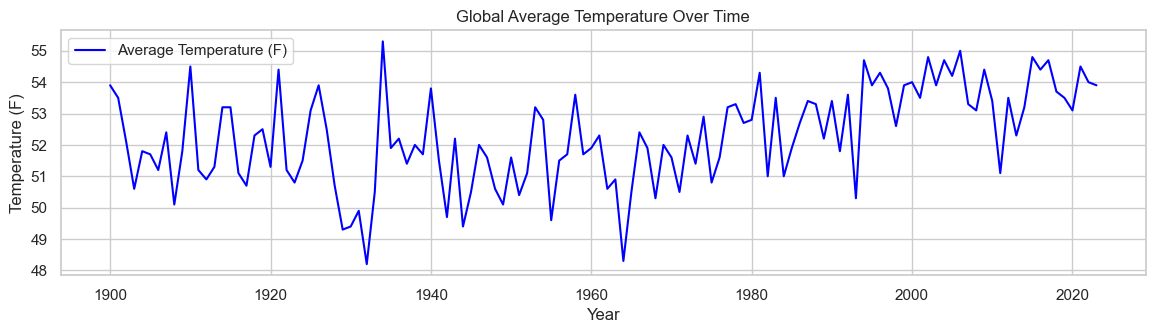

In [39]:
# Setting up the aesthetics for plots
sns.set(style="whitegrid")

# Preparing data for scatter plot (merging datasets on 'Year')
merged_data = pd.merge(temperature_df, co2_emissions_df, on="Year", how="inner")

# Time Series Plot for Average Temperature
plt.figure(figsize=(14, 7))
plt.subplot(2, 1, 1)
plt.plot(temperature_df["Year"], temperature_df["Average_Fahrenheit_Temperature"], color='blue', label='Average Temperature (F)')
plt.xlabel('Year')
plt.ylabel('Temperature (F)')
plt.title('Global Average Temperature Over Time')
plt.legend()


#### The plot below illustrates the trend in global CO2 emissions over time, starting from the year 1900 onwards. CO2 emissions are measured in billion metric tons, and each point on the graph represents the total global emissions for a given year.



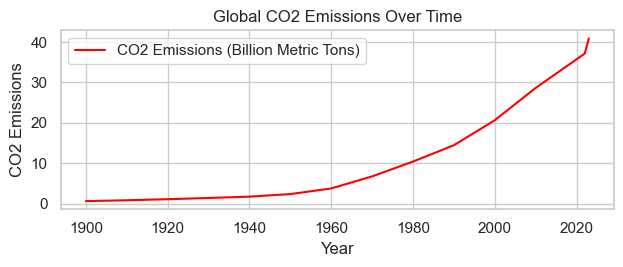

In [32]:
# Filtering the CO2 Emissions data to start from 1900 onwards for a consistent comparison
co2_emissions_filtered_df = co2_emissions_df[co2_emissions_df["Year"] >= 1900]
# Plot for CO2 Emissions
plt.subplot(2, 1, 2)
plt.plot(co2_emissions_filtered_df["Year"], co2_emissions_filtered_df["Emissions"], color='red', label='CO2 Emissions (Billion Metric Tons)')
plt.xlabel('Year')
plt.ylabel('CO2 Emissions')
plt.title('Global CO2 Emissions Over Time')
plt.legend()

plt.tight_layout()
plt.show()



#### Trend Observation: The plot shows a general upward trend in CO2 emissions over the analyzed period. This trend reflects the increase in industrial activities, fossil fuel consumption, deforestation, and other human activities contributing to CO2 emissions.

#### Significant Points: Any sharp increases, decreases, or periods of stabilization in the plot can indicate significant historical events, policy changes, or technological advancements that impacted CO2 emissions. 

### 'SCATTER PLOT'

#### The scatter plot represents the relationship between global CO2 emissions (in billion metric tons) and the global average temperature (in Fahrenheit) for the years where data for both metrics are available.

/Users/samar/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/samar/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


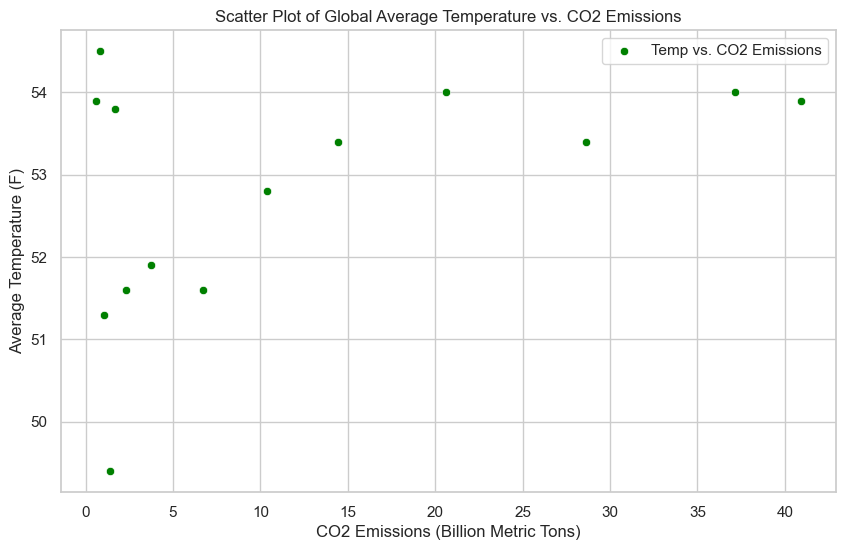

,Average_Fahrenheit_Temperature,Emissions
Average_Fahrenheit_Temperature,1.000000,0.447713
Emissions,0.447713,1.000000


In [33]:
# Scatter Plot for Temperature vs. CO2 Emissions
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Emissions', y='Average_Fahrenheit_Temperature', data=merged_data, color='green', label='Temp vs. CO2 Emissions')
plt.xlabel('CO2 Emissions (Billion Metric Tons)')
plt.ylabel('Average Temperature (F)')
plt.title('Scatter Plot of Global Average Temperature vs. CO2 Emissions')
plt.legend()
plt.show()

# Pearson Correlation
correlation_result = merged_data[['Average_Fahrenheit_Temperature', 'Emissions']].corr()
correlation_result



#### Positive Relationship: The plot suggests a positive relationship between CO2 emissions and global average temperature. As CO2 emissions increase, the average temperature also tends to increase. This is indicative of a possible link between human-induced emissions and global warming.

#### Variability: While the general trend appears to be positive, there is noticeable variability. Some years with similar levels of CO2 emissions have different temperatures, which can be attributed to other factors affecting global temperatures, such as volcanic eruptions, solar cycles, or oceanic patterns like El Niño.


### <span style="color:red"> 'GRANGER CAUSALITY TEST'</span>

#### The Granger causality test is a statistical hypothesis test for determining whether one time series is useful in forecasting another. While it does not definitively prove causation in the philosophical sense, it does indicate a predictive causal relationship from a temporal perspective. Below, I will outline the mathematical foundations of the Granger causality test.

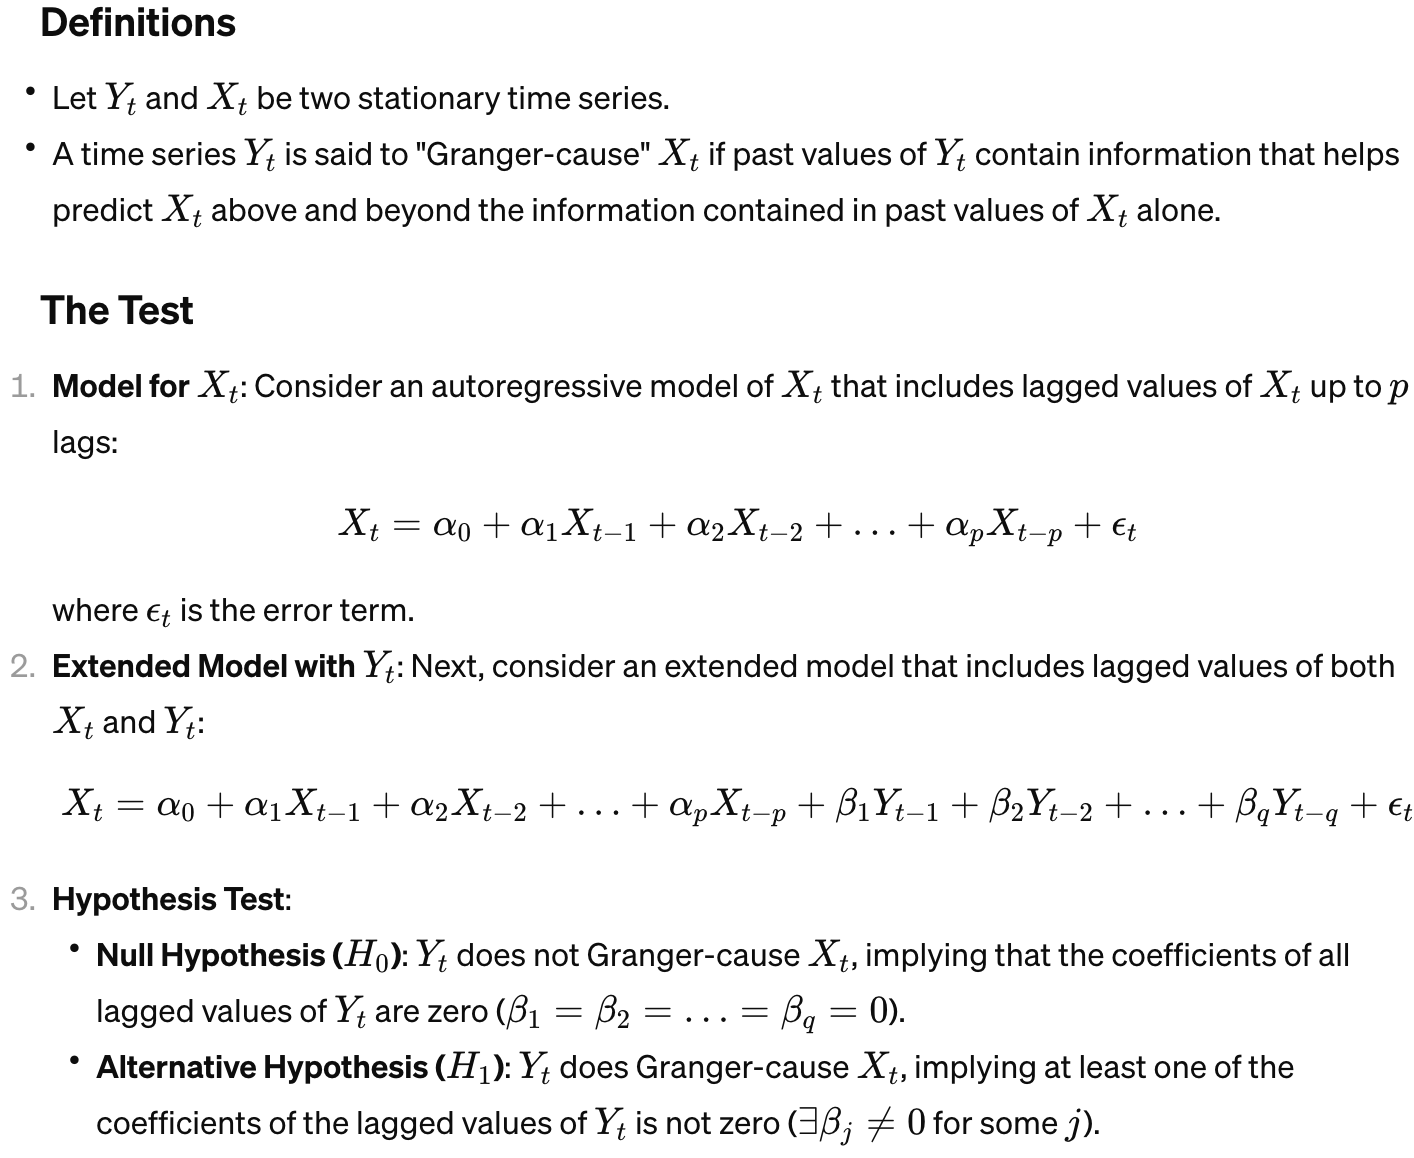

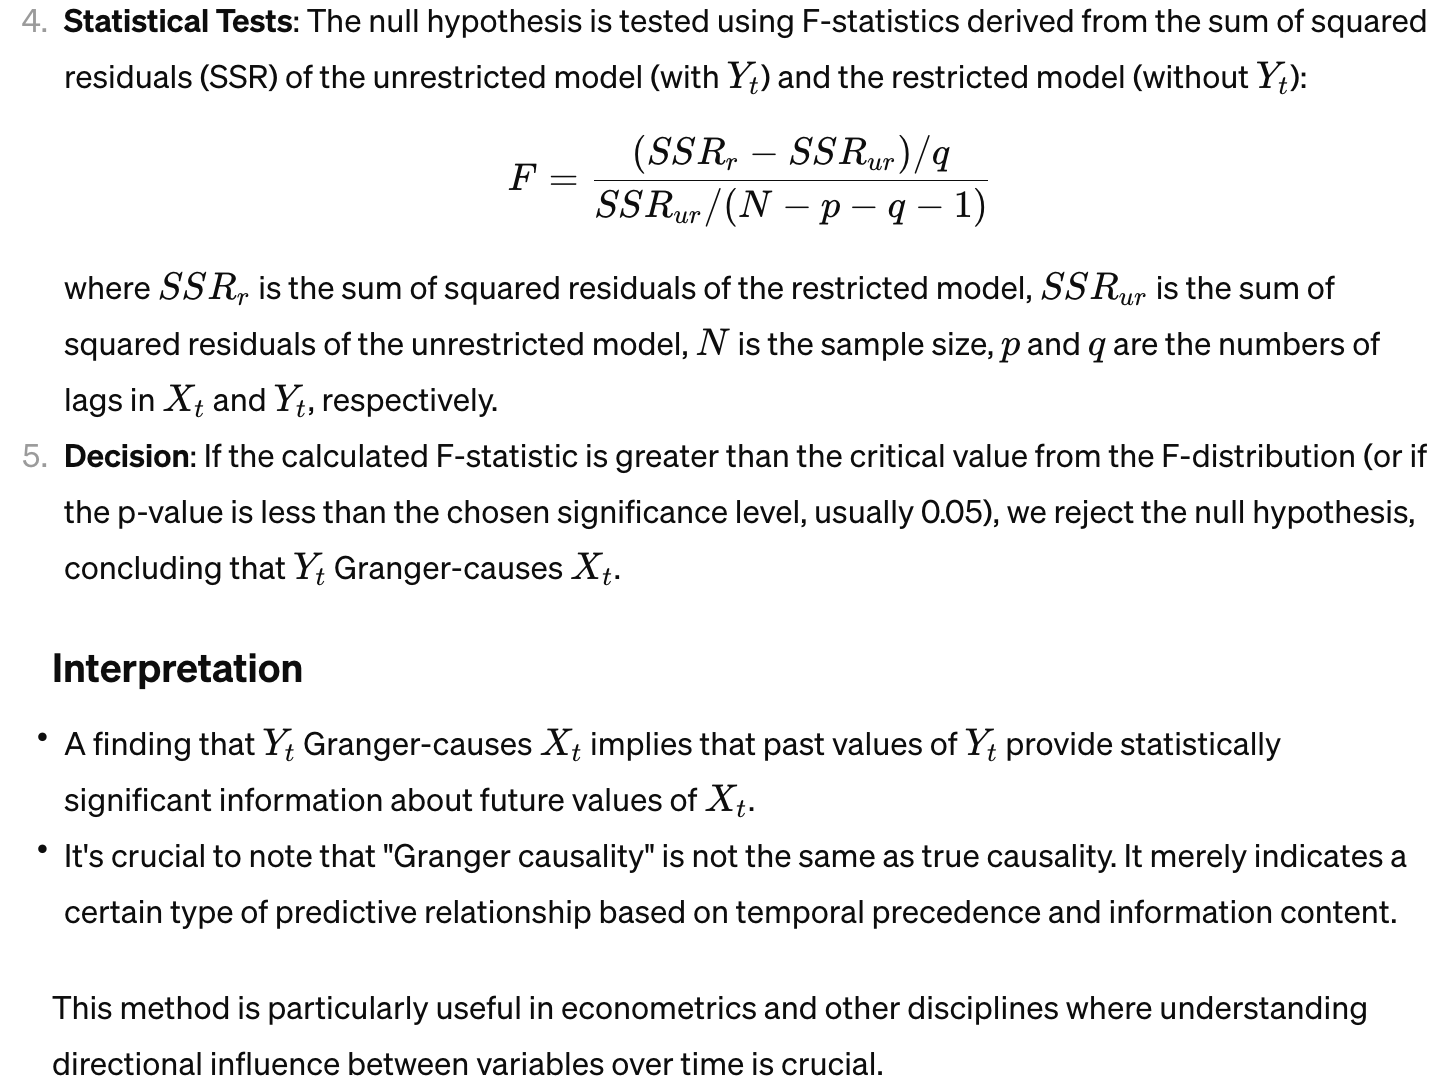

In [40]:
from statsmodels.tsa.stattools import grangercausalitytests

# Preparing data for Granger Causality Test
# Ensuring the data is in the correct format, with time as index
gc_data = merged_data[['Year', 'Average_Fahrenheit_Temperature', 'Emissions']].set_index('Year')

# Performing Granger Causality Test with 2 lags
granger_result = grangercausalitytests(gc_data, maxlag=2, verbose=True)

# Extracting the F-test and p-value from the results for lag 2
f_test_lag2 = granger_result[2][0]['ssr_ftest']
p_value_lag2 = granger_result[2][0]['ssr_ftest'][1]

f_test_lag2, p_value_lag2



Granger Causality
number of lags (no zero) 1
ssr based F test:         F=2.9247  , p=0.1180  , df_denom=10, df_num=1
ssr based chi2 test:   chi2=3.8021  , p=0.0512  , df=1
likelihood ratio test: chi2=3.3352  , p=0.0678  , df=1
parameter F test:         F=2.9247  , p=0.1180  , df_denom=10, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=6.2113  , p=0.0281  , df_denom=7, df_num=2
ssr based chi2 test:   chi2=21.2957 , p=0.0000  , df=2
likelihood ratio test: chi2=12.2463 , p=0.0022  , df=2
parameter F test:         F=6.2113  , p=0.0281  , df_denom=7, df_num=2


/Users/samar/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/stattools.py:1488: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(


((6.211258936534409, 0.028104365564535796, 7.0, 2), 0.028104365564535796)

#### The Granger Causality Test results for the relationship between CO2 emissions and average temperature with 2 lags are as follows: 

#### <span style="color:red"> 'The F-test statistic is approximately 6.21.'</span>

#### <span style="color:red"> 'The p-value is 0.0281.'</span>|

#### This result indicates that there is a statistically significant Granger causality from CO2 emissions to average temperature at the 5% significance level with 2 lags considered.

 ### <span style="color:red">ADDITIONAL TEST (COINTEGRATION)</span>|

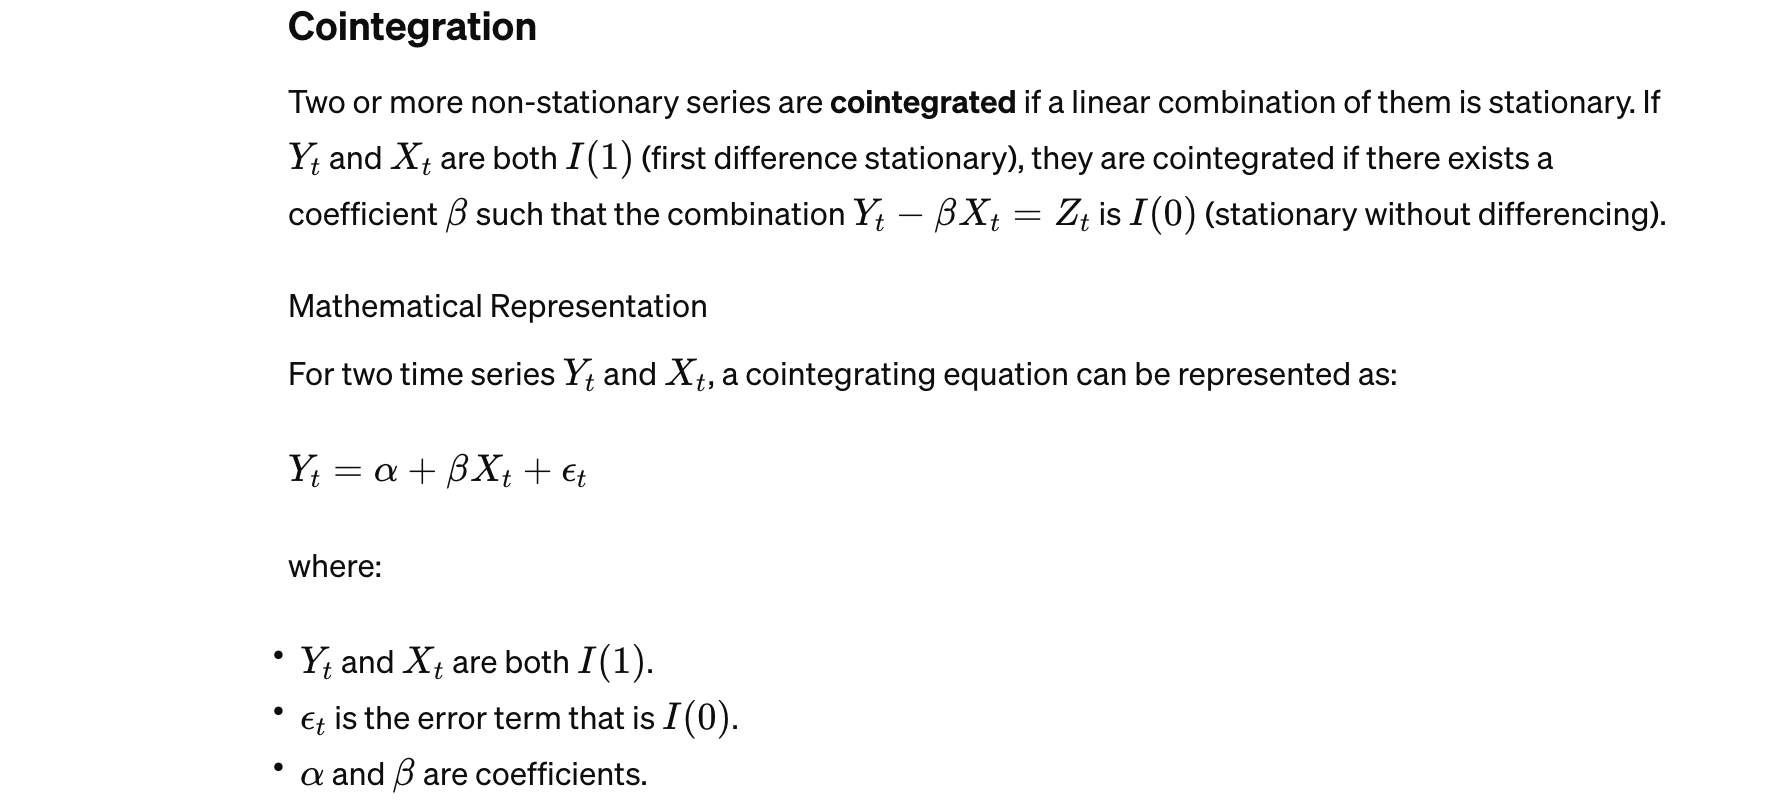

### Introduction to the New Worked Example Problem (Target Variable Remains The Same, Only The Independet Variable Is More Dense)

In [2]:
# Loading the new dataset for greenhouse gas emissions
greenhouse_gases_df = pd.read_csv('https://raw.githubusercontent.com/Samar1947/Dataset/main/owid-co2-data%202.csv')

# Since the temperature dataset might be the same, we will reload it to ensure consistency
temperature_df_new = pd.read_csv('https://raw.githubusercontent.com/Samar1947/Dataset/main/Average%20Temperature%201900-2023.csv')

# Displaying the first few rows of the greenhouse gas emissions dataset to understand its structure
greenhouse_gases_df_head = greenhouse_gases_df.head()

greenhouse_gases_df_head


,iso_code,country,year,co2,co2_growth_prct,co2_growth_abs,consumption_co2,trade_co2,trade_co2_share,co2_per_capita,...,ghg_per_capita,methane,methane_per_capita,nitrous_oxide,nitrous_oxide_per_capita,primary_energy_consumption,energy_per_capita,energy_per_gdp,population,gdp
0,AFG,Afghanistan,1949,0.015,NaN,NaN,NaN,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7663783.0,NaN
1,AFG,Afghanistan,1950,0.084,475.000,0.070,NaN,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7752000.0,1.949480e+10
2,AFG,Afghanistan,1951,0.092,8.696,0.007,NaN,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7840000.0,2.006385e+10
3,AFG,Afghanistan,1952,0.092,0.000,0.000,NaN,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7936000.0,2.074235e+10
4,AFG,Afghanistan,1953,0.106,16.000,0.015,NaN,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8040000.0,2.201546e+10


In [36]:
# Aggregating the CO2 emissions to get a global total per year, starting from 1900 for consistency
global_co2_annual = greenhouse_gases_df.groupby('year')['co2'].sum().reset_index()

# Filtering to ensure the year range matches that of the temperature dataset (1900 onwards)
global_co2_annual_filtered = global_co2_annual[global_co2_annual['year'] >= 1900]

# Merging this aggregated CO2 data with the temperature dataset on 'Year'
merged_data_new = pd.merge(temperature_df_new, global_co2_annual_filtered, left_on='Year', right_on='year', how='inner').drop(columns=['year'])

# Checking the first few rows of the merged dataset to ensure it's correctly formatted
merged_data_new.head()



,Year,Average_Fahrenheit_Temperature,co2
0,1900,53.9,8245.659
1,1901,53.5,8423.548
2,1902,52.1,8579.584
3,1903,50.6,9244.873
4,1904,51.8,9373.515


In [37]:
from statsmodels.tsa.stattools import coint

# Preparing the time series data for cointegration testing
# Note: The data has already been merged and aligned by year in 'merged_data_new'
temperature_series = merged_data_new['Average_Fahrenheit_Temperature']
co2_series = merged_data_new['co2']

# Performing the Cointegration Test
coint_t, p_value, crit_values = coint(temperature_series, co2_series)

coint_t, p_value, crit_values


(-8.90411626083069,
 1.5303215910597338e-13,
 array([-3.99166057, -3.38840053, -3.08058772]))

#### These results suggest that there is a statistically significant long-term relationship between the global average temperature and CO2 emissions time series. This implies that the variables share a common stochastic trend and, therefore, are likely to move together over the long term. This is a strong indicator of a potential long-term equilibrium relationship between CO2 emissions and global average temperature, supporting the idea that changes in CO2 emissions are associated with changes in global temperatures over time

### CONCLUSION

#### Cointegration Testing: Demonstrated a statistically significant long-term relationship between the two variables, suggesting they move together over the long term and share a common stochastic trend.

#### Granger Causality Test: Provided evidence of predictability, indicating that past values of CO2 emissions contain useful information for predicting future values of global temperature, which supports the notion of a directional relationship.

#### Our work illuminated the complex and statistically significant relationship between CO2 emissions and global average temperatures. The analyses suggest not only a correlation but also a long-term cointegration and potential causality, where CO2 emissions can predict future temperature changes. These findings contribute to the broader understanding of climate change dynamics, highlighting the critical impact of greenhouse gas emissions on global temperature trends.

### REFERENCES

1. https://www.kaggle.com/datasets/daverosenman/nba-finals-team-stats

2. https://towardsdatascience.com/tagged/sports-analytics

3. https://www.newscientist.com/definition/causality/

### LICENSE

Copyright (c) 2023 Samarjeet Chavan

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.